In [36]:
from PIL import Image
import numpy as np
import joblib
from othermodel.prediction2 import card_prediction_processing, card_ocr_crop
from othermodel.text_detection2 import get_pokeid
from othermodel.deformer2 import deform_card


# 1. Load image (as a PIL.Image!)
img_path = "images_example/IMG_9401.jpg"
pil_img = Image.open(img_path)

# 2. Deform/deskew the card (returns np.ndarray, shape=(width, height, 3))
aligned_card = deform_card(pil_img)  # Now card is centered, straight, and standard size

# 3. Continue as before
graybottomleft, graybottomright = card_prediction_processing(aligned_card)

# 3. Load models and label encoders
model_left = joblib.load("weights/pokereader_left99.pkl")
model_right = joblib.load("weights/pokereader_right99.pkl")
label_encoder_left = np.array(['no', 'sm4', 'sv2', 'sv3', 'sv3pt5', 'sv4', 'swsh10', 'swsh12pt5', 'swsh45', 'swsh6', 'swsh9'])
label_encoder_right = np.array(['dp1', 'dp2', 'dv1', 'g1', 'no', 'xy1', 'xy2', 'xy3', 'xy4', 'xy6', 'xy7'])



# 4. Predict
pred_left = model_left.predict(graybottomleft)
pred_right = model_right.predict(graybottomright)
set_left = label_encoder_left[np.argmax(pred_left)]
set_right = label_encoder_right[np.argmax(pred_right)]

# 5. Select the most likely set
if set_right == 'no' and set_left == 'no':
    print("Please try again!")
elif set_right != 'no' and set_left != 'no':
    print("Too many sets detected.")
elif set_right == 'no':
    set_id = set_left
elif set_left == 'no':
    set_id = set_right

print("Predicted set:", set_id)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted set: swsh45


In [37]:
print(graybottomright.shape, graybottomright.dtype)


(1, 72, 200, 1) float64


In [38]:
print(np.min(graybottomright), np.max(graybottomright), np.mean(graybottomright))


0.03529411764705882 0.8313725490196079 0.5110623638344226


In [39]:
pred = model_left.predict(graybottomright)
print("Raw prediction:", pred)
print("Argmax index:", np.argmax(pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Raw prediction: [[9.9999928e-01 5.3423990e-09 9.1314212e-10 4.4328918e-13 6.4945891e-07
  1.1665345e-10 3.0692542e-11 2.0987928e-16 8.1759680e-08 7.5627170e-08
  1.3812058e-12]]
Argmax index: 0


In [43]:
print("Model output shape:", model_left.output_shape)
print("Label encoder length:", len(label_encoder_left))


Model output shape: (None, 11)
Label encoder length: 11


In [44]:
model_left.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 69, 197, 32)    │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 34, 98, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 96, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 7, 23, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 7, 23, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 22, 128)     │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 3, 11, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4224)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       270,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           715 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,289,027 (4.92 MB)

 Trainable params: 429,675 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 859,352 (3.28 MB)

In [45]:
from PIL import Image
import numpy as np
import joblib
from othermodel.prediction2 import card_prediction_processing, card_ocr_crop
from othermodel.text_detection2 import get_pokeid


# 1. Load image
img_path = 'images_example/IMG_9401.jpg'
img = np.array(Image.open(img_path))

# 2. Crop corners (substitute your own function as needed)
graybottomleft, graybottomright = card_prediction_processing(img)

In [71]:
from PIL import Image
from model.deformer import deform_card

img_path = 'images_example/IMG_9401.jpg'
img = Image.open(img_path)  # <-- Do NOT convert to np.array here!

aligned_pokemon = deform_card(img)


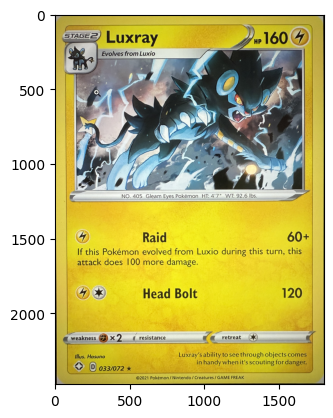

In [72]:
import matplotlib.pyplot as plt
plt.imshow(aligned_pokemon)
plt.show()


In [73]:
print("Shape:", graybottomleft.shape)
print("Dtype:", graybottomleft.dtype)
print("Min/Max:", np.min(graybottomleft), np.max(graybottomleft))


Shape: (1, 72, 200, 1)
Dtype: float64
Min/Max: 0.0196078431372549 0.7254901960784313


In [74]:
print("graybottomleft shape:", graybottomleft.shape)
print("graybottomleft dtype:", graybottomleft.dtype)
print("min/max:", np.min(graybottomleft), np.max(graybottomleft))


graybottomleft shape: (1, 72, 200, 1)
graybottomleft dtype: float64
min/max: 0.0196078431372549 0.7254901960784313


In [81]:
from othermodel import INITIAL_HEIGHT, INITIAL_WIDTH, HARD_CODED_HEIGHT, HARD_CODED_WIDTH

print("INITIAL_WIDTH", INITIAL_WIDTH)
print("INITIAL_HEIGHT", INITIAL_HEIGHT)
print("HARD_CODED_WIDTH", HARD_CODED_WIDTH)
print("HARD_CODED_HEIGHT", HARD_CODED_HEIGHT)
print("Input image shape:", aligned_pokemon.shape)


INITIAL_WIDTH 600
INITIAL_HEIGHT 825
HARD_CODED_WIDTH 200
HARD_CODED_HEIGHT 72
Input image shape: (2475, 1800, 3)


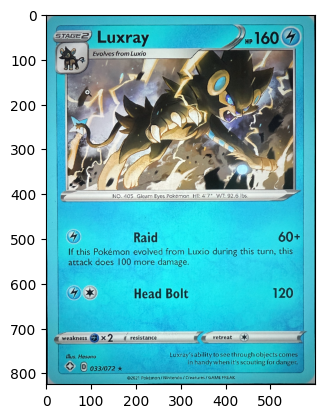

In [82]:
import cv2
import matplotlib.pyplot as plt
from othermodel.deformer2 import deform_card

# After resizing:
card_image = cv2.resize(aligned_pokemon, (INITIAL_WIDTH, INITIAL_HEIGHT))
plt.imshow(cv2.cvtColor(card_image, cv2.COLOR_BGR2RGB))
plt.show()


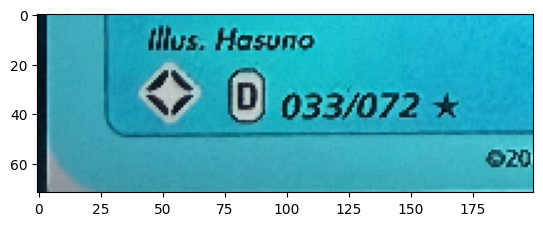

In [83]:
h, w, d = card_image.shape
bottomleft = card_image[h-HARD_CODED_HEIGHT:, :HARD_CODED_WIDTH, :]
plt.imshow(cv2.cvtColor(bottomleft, cv2.COLOR_BGR2RGB))
plt.show()


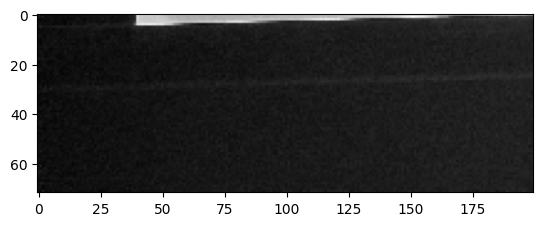

In [84]:
import matplotlib.pyplot as plt
plt.imshow(graybottomleft[0, :, :, 0], cmap='gray')